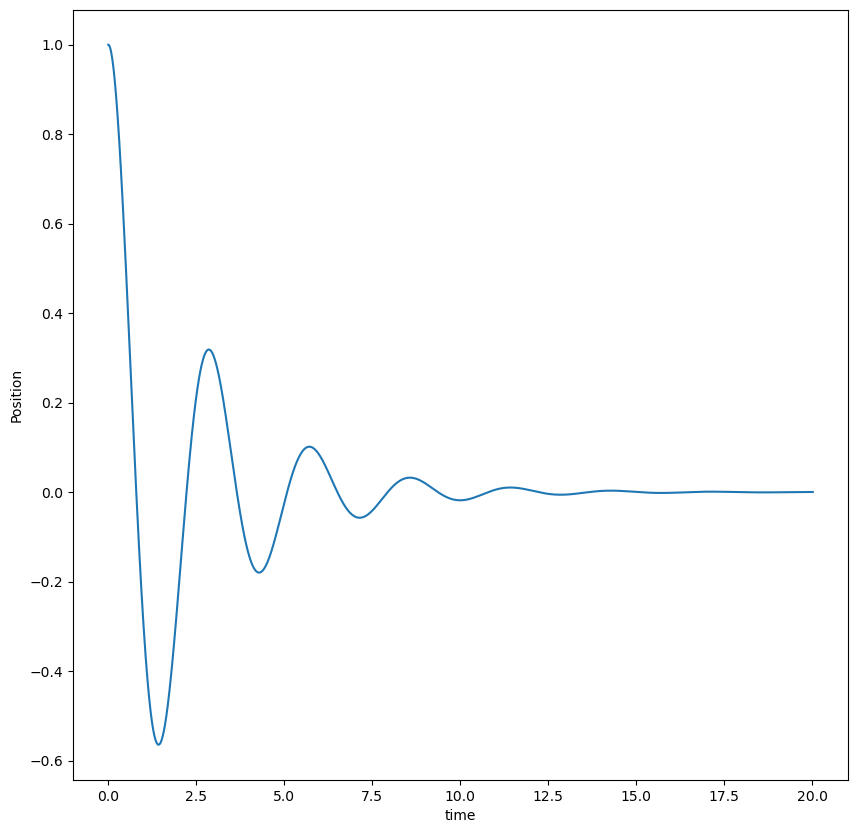

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#simulate a system 

from scipy.interpolate import interp1d

#function to solve | the equations is taken from the material provided in class
def func(t,s,F_fun,m,b,k):
    #pdb.set_trace()
    dsdt = np.array([[0,1],[-k/m, -b/m]])@s + np.array([0,1/m])*F_fun(t)
    return dsdt


#solvin the ODE using python 
h = 0.01
t_eval = np.arange(0,20 + h, h)
S0 = np.array([1, 0])

F = np.zeros_like(t_eval)
#F[(t_eval>=4) & (t_eval<=8)]=1
F_fun = interp1d(x=t_eval, y=F) # we are creating a way to evaluate F at each t using linear interpolation     


k=5
m=1
b=0.8
sol = solve_ivp(func, [t_eval[0], t_eval[-1]], S0, t_eval=t_eval, args=(F_fun,m,b,k))

fig, ax= plt.subplots(1,1,figsize = (10, 10), sharex=True)
ax.plot(sol.t, sol.y[0], label='b=1')
ax.set_xlabel('time')
ax.set_ylabel('Position')
plt.show()

In [2]:
np.savetxt('msd.txt',sol.y[0])